# Recogmem: Group Analysis

Exploring an openly available NWB formatted dataset from the Rutishauser lab, with available 
[data](https://osf.io/hv7ja/), and associated [code](https://github.com/rutishauserlab/recogmem-release-NWB).

In [1]:
%config Completer.use_jedi = False

In [2]:
import os
from pathlib import Path
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from pynwb import NWBHDF5IO

## Data Setup

In [3]:
# Set the data path
data_path = Path('/Users/tom/Documents/Data/SingleUnits/Rutishauser/')

# Get a list of available files
files = os.listdir(data_path)

In [4]:
# Check the total number of available files (sessions)
print('Total number of files: {:4d}'.format(len(files)))

Total number of files:   87


In [5]:
# Check the total number of unique subjects
print('Total number of unique subject: {:4d}'.format(len(set([el.split('_')[0] for el in files]))))

Total number of unique subject:   59


## Group Level Analysis

In [6]:
# Set up some data stores
n_wires = {}
n_units = {}
locations = {}
waveforms = []

In [7]:
# Loop through all files, and collect some information across the group
for file in files:
    with NWBHDF5IO(str(data_path / file), 'r') as io:
        nwbfile = io.read()

        n_wires[nwbfile.identifier] = len(nwbfile.electrodes.id[:])
        n_units[nwbfile.identifier] = len(nwbfile.units.origClusterID[:]) 
        locations[nwbfile.identifier] = set(nwbfile.electrodes.location[:])
        waveforms.append(nwbfile.units['waveform_mean_encoding'].data[:])

### Wires & Units

In [8]:
# Check the total number of wires & units
print('Total number of wires:   {:4d}'.format(sum(n_wires.values())))
print('Total number of units:   {:4d}'.format(sum(n_units.values())))

Total number of wires:    887
Total number of units:   1864


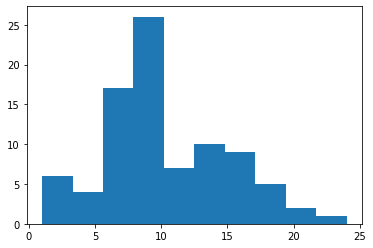

In [9]:
# Check the distribution of wires
plt.hist(n_wires.values());

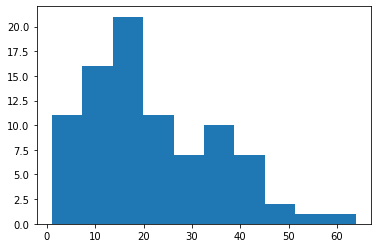

In [10]:
# Check the distribution of units
plt.hist(n_units.values());

In [11]:
# Print out information per session
print('IDENTIFIER   \t   N_WIRES   \t   N_UNITS')
for identifier in n_wires.keys():
    print('{:8}\t\t{:2}\t\t{:2}'.format(identifier, n_wires[identifier], n_units[identifier]))

IDENTIFIER   	   N_WIRES   	   N_UNITS
H19_28  		 7		15
H18_26  		16		33
H10_7   		18		38
H29_49  		10		27
CS29_69 		17		64
CS38_102		17		44
CS49_118		11		13
CS60_134		 8		14
CS48_116		14		36
H16_23  		 9		18
CS26_64 		 9		33
CS54_124		17		43
CS54_125		24		46
H14_17  		 9		23
CS53_123		 4		 6
H27_58  		14		49
CS54_126		15		34
CS53_122		15		27
CS26_66 		 6		11
CS32_74 		 9		35
H42_55  		13		32
H15_20  		11		20
CS33_77 		11		30
CS56_128		 7		 7
CS42_111		10		14
CS33_76 		14		53
T98_2005		11		13
H15_21  		 7		14
H16_24  		18		21
H42_54  		13		32
H31_50  		 7		14
CS57_130		11		16
CS57_131		 9		11
CS42_112		 7		12
CS37_96 		 8		13
H21_41  		 6		15
CS27_67 		 8		15
T100_2008		 1		 1
CS33_78 		 9		13
H23_47  		 7		17
H47_97  		 7		10
CS40_101		10		14
CS44_114		 9		15
H23_44  		 8		23
CS43_113		14		21
CS34_85 		 4		 6
T107_2007		 3		 3
CS24_60 		 9		22
CS51_120		 8		15
H17_32  		16		43
H43_56  		 6		15
T89_2004		21		31
CS25_63 		11		14
CS24_59 		 7		21
T88_2002		 4		 4
CS51_119		10		16
T101_20

### Locations

In [12]:
all_locations = [item for sublist in locations.values() for item in sublist]

In [13]:
set(all_locations)

{'Left Amygdala', 'Left Hippocampus', 'Right Amygdala', 'Right Hippocampus'}

In [14]:
location_counts = Counter(all_locations)

In [15]:
location_counts

Counter({'Right Amygdala': 59,
         'Left Amygdala': 54,
         'Left Hippocampus': 50,
         'Right Hippocampus': 53})

In [16]:
# Print out information per session
print('IDENTIFIER   \t\tLOCATIONS')
for identifier in locations.keys():
    print('{:8}\t\t{}'.format(identifier, ', '.join(locations[identifier])))

IDENTIFIER   		LOCATIONS
H19_28  		Right Amygdala, Left Amygdala
H18_26  		Right Amygdala, Left Hippocampus, Right Hippocampus, Left Amygdala
H10_7   		Right Amygdala, Right Hippocampus, Left Amygdala
H29_49  		Right Amygdala, Right Hippocampus, Left Amygdala
CS29_69 		Left Hippocampus, Right Hippocampus, Left Amygdala
CS38_102		Right Amygdala, Left Hippocampus, Right Hippocampus, Left Amygdala
CS49_118		Right Amygdala, Right Hippocampus
CS60_134		Right Amygdala, Right Hippocampus
CS48_116		Right Amygdala, Right Hippocampus, Left Amygdala
H16_23  		Right Amygdala, Left Hippocampus
CS26_64 		Left Hippocampus, Left Amygdala
CS54_124		Right Amygdala, Left Hippocampus, Right Hippocampus, Left Amygdala
CS54_125		Right Amygdala, Left Hippocampus, Right Hippocampus, Left Amygdala
H14_17  		Right Amygdala, Left Hippocampus
CS53_123		Right Hippocampus, Left Amygdala
H27_58  		Left Hippocampus, Right Hippocampus
CS54_126		Right Amygdala, Left Hippocampus, Right Hippocampus, Left Amygdala
CS53_12

### Waveforms

In [17]:
# Concatenate all the neurons together
all_waveforms = np.concatenate(waveforms)

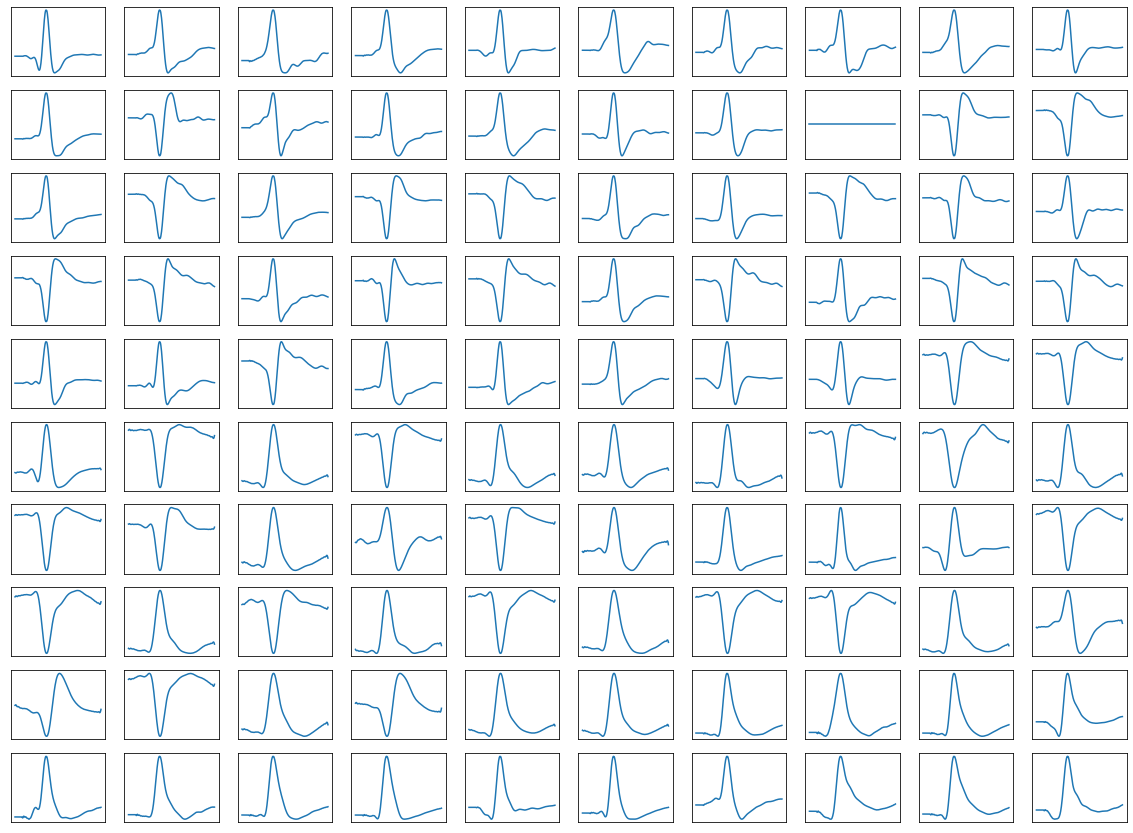

In [18]:
# Plot the first 100 unit waveforms, across all recorded sessions
_, axes = plt.subplots(10, 10, figsize=(20, 15))
for waveform, ax in zip(all_waveforms, axes.flatten()):
    ax.plot(waveform)
    ax.set(xticks=[], yticks=[])